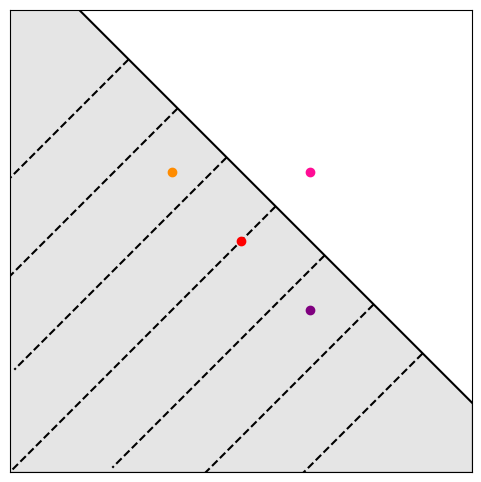

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

p_r = np.array([0, 0])
p_o = np.array([-3, 3])
p_v = np.array([3, 3])
p_new = np.array([3, -3])

def calculate_bisector(p1, p2):
    midpoint = (p1 + p2) / 2
    if p2[0] - p1[0] != 0:
        slope_segment = (p2[1] - p1[1]) / (p2[0] - p1[0])
        slope_perpendicular = -1 / slope_segment
    else:
        slope_perpendicular = 0
    intercept = midpoint[1] - slope_perpendicular * midpoint[0]
    return slope_perpendicular, intercept, midpoint

bisector_pr_pv, intercept_pr_pv, midpoint_pr_pv = calculate_bisector(p_r, p_v)

x = np.linspace(-10, 10, 1000)
y_pr_pv = bisector_pr_pv * x + intercept_pr_pv

fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(x, y_pr_pv, color='#000000', label='-')

ax.fill_between(x, y_pr_pv, -10, where=y_pr_pv > -10, color='black', alpha=0.1)

bisector_pr_po, intercept_pr_po, midpoint_pr_po = calculate_bisector(p_r, p_o)
distance = 9
def calculate_distant_point(slope, intercept, midpoint, distance):
    if slope == 0:
        point_1 = midpoint + np.array([distance, 0])
        point_2 = midpoint - np.array([distance, 0])
    else:
        angle = np.arctan(slope)
        x_offset = distance * np.cos(angle)
        y_offset = distance * np.sin(angle)
        point_1 = midpoint + np.array([x_offset, y_offset])
        point_2 = midpoint - np.array([x_offset, y_offset])
    return point_1, point_2
point_1_pr_pv, point_2_pr_pv = calculate_distant_point(bisector_pr_pv, intercept_pr_pv, midpoint_pr_pv, distance)

point_3_pr_pv = midpoint_pr_pv + (point_1_pr_pv - midpoint_pr_pv) * 1/3
point_4_pr_pv = midpoint_pr_pv + (point_1_pr_pv - midpoint_pr_pv) * 2/3
point_5_pr_pv = midpoint_pr_pv + (point_2_pr_pv - midpoint_pr_pv) * 1/3
point_6_pr_pv = midpoint_pr_pv + (point_2_pr_pv - midpoint_pr_pv) * 2/3

def calculate_half_line_points(point, slope, scale_factor):
    if slope == 0:
        point_close = point + np.array([1, 0]) * scale_factor
        point_far = point + np.array([-1, 0]) * scale_factor
    else:
        perpendicular_slope = -1 / slope
        direction_vector = np.array([1, perpendicular_slope])
        direction_vector /= np.linalg.norm(direction_vector)
        point_close = point + direction_vector * scale_factor
        point_far = point - direction_vector * scale_factor
    if np.linalg.norm(point_close - p_r) < np.linalg.norm(point_far - p_r):
        return point, point_close
    else:
        return point, point_far
scale_factor = 13

half_line_points = [
    calculate_half_line_points(point_1_pr_pv, bisector_pr_pv, scale_factor),
    calculate_half_line_points(point_2_pr_pv, bisector_pr_pv, scale_factor),
    calculate_half_line_points(point_3_pr_pv, bisector_pr_pv, scale_factor),
    calculate_half_line_points(point_4_pr_pv, bisector_pr_pv, scale_factor),
    calculate_half_line_points(point_5_pr_pv, bisector_pr_pv, scale_factor),
    calculate_half_line_points(point_6_pr_pv, bisector_pr_pv, scale_factor),
]
half_line_midpoint_pr_pv = calculate_half_line_points(midpoint_pr_pv, bisector_pr_pv, 1.5)
half_line_midpoint_pr_po = calculate_half_line_points(midpoint_pr_po, bisector_pr_po, 1.5)
x_values = np.linspace(-10, 10, 400)
line_pr_pv = bisector_pr_pv * x_values + intercept_pr_pv
line_pr_po = bisector_pr_po * x_values + intercept_pr_po

for i in range(6):
    color = 'black'
    linestyle = '--'
    plt.plot([half_line_points[i][0][0], half_line_points[i][1][0]],
             [half_line_points[i][0][1], half_line_points[i][1][1]], color=color, linestyle=linestyle)

perpendicular_point_pr_pv_1, perpendicular_point_pr_pv_2 = calculate_perpendicular_point(midpoint_pr_pv, bisector_pr_pv, distance, scale_factor)
perpendicular_point_pr_po_1, perpendicular_point_pr_po_2 = calculate_perpendicular_point(midpoint_pr_po, bisector_pr_po, distance, scale_factor)
plt.plot([midpoint_pr_pv[0], perpendicular_point_pr_pv_2[0]], [midpoint_pr_pv[1], perpendicular_point_pr_pv_2[1]], color='black', linestyle='--')

plt.plot(p_r[0], p_r[1], 'ro')
plt.plot(p_o[0], p_o[1], color='#FF8C00', marker='o')
plt.plot(p_v[0], p_v[1], color='#FF0D95', marker='o')
plt.plot(p_new[0], p_new[1], color='#800080', marker='o')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend().remove()
plt.xticks([])
plt.yticks([])
plt.savefig('4points.svg')
plt.show()

étape 1 ; étape 2 ; étape 3

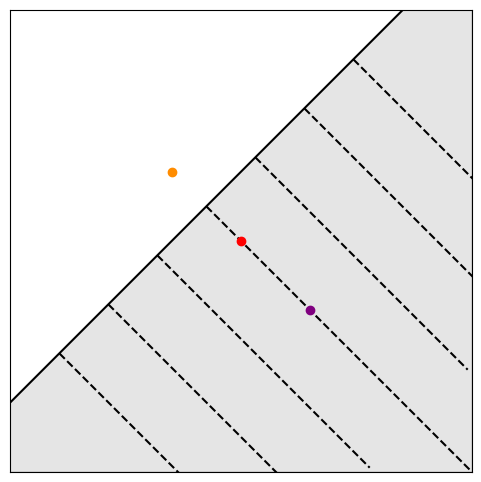

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

p_r = np.array([0, 0])
p_o = np.array([-3, 3])
p_v = np.array([3, -3])

def calculate_bisector(p1, p2):
    midpoint = (p1 + p2) / 2

    if p2[0] - p1[0] != 0:
        slope_segment = (p2[1] - p1[1]) / (p2[0] - p1[0])
        slope_perpendicular = -1 / slope_segment
    else:
        slope_perpendicular = 0

    intercept = midpoint[1] - slope_perpendicular * midpoint[0]

    return slope_perpendicular, intercept, midpoint

def calculate_perpendicular_point(point, slope, distance, scale_factor):
    if slope == 0:
        perpendicular_point_1 = point + np.array([0, distance * scale_factor])
        perpendicular_point_2 = point + np.array([0, -distance * scale_factor])
    else:
        perpendicular_slope = -1 / slope
        direction_vector = np.array([1, perpendicular_slope])
        direction_vector /= np.linalg.norm(direction_vector)
        perpendicular_point_1 = point + direction_vector * distance * scale_factor
        perpendicular_point_2 = point - direction_vector * distance * scale_factor

    return perpendicular_point_1, perpendicular_point_2

bisector_pr_pv, intercept_pr_pv, midpoint_pr_pv = calculate_bisector(p_r, p_v)
bisector_pr_po, intercept_pr_po, midpoint_pr_po = calculate_bisector(p_r, p_o)

distance = 9

def calculate_distant_point(slope, intercept, midpoint, distance):
    if slope == 0:
        point_1 = midpoint + np.array([distance, 0])
        point_2 = midpoint - np.array([distance, 0])
    else:
        angle = np.arctan(slope)
        x_offset = distance * np.cos(angle)
        y_offset = distance * np.sin(angle)
        point_1 = midpoint + np.array([x_offset, y_offset])
        point_2 = midpoint - np.array([x_offset, y_offset])

    return point_1, point_2

point_1_pr_po, point_2_pr_po = calculate_distant_point(bisector_pr_po, intercept_pr_po, midpoint_pr_po, distance)
point_3_pr_po = midpoint_pr_po + (point_1_pr_po - midpoint_pr_po) * 1/3
point_4_pr_po = midpoint_pr_po + (point_1_pr_po - midpoint_pr_po) * 2/3
point_5_pr_po = midpoint_pr_po + (point_2_pr_po - midpoint_pr_po) * 1/3
point_6_pr_po = midpoint_pr_po + (point_2_pr_po - midpoint_pr_po) * 2/3

def calculate_half_line_points(point, slope, scale_factor):
    if slope == 0:
        point_close = point + np.array([1, 0]) * scale_factor
        point_far = point + np.array([-1, 0]) * scale_factor
    else:
        perpendicular_slope = -1 / slope
        direction_vector = np.array([1, perpendicular_slope])
        direction_vector /= np.linalg.norm(direction_vector)
        point_close = point + direction_vector * scale_factor
        point_far = point - direction_vector * scale_factor

    if np.linalg.norm(point_close - p_r) < np.linalg.norm(point_far - p_r):
        return point, point_close
    else:
        return point, point_far

scale_factor = 13
half_line_points = [
    calculate_half_line_points(point_1_pr_po, bisector_pr_po, scale_factor),
    calculate_half_line_points(point_2_pr_po, bisector_pr_po, scale_factor),
    calculate_half_line_points(point_3_pr_po, bisector_pr_po, scale_factor),
    calculate_half_line_points(point_4_pr_po, bisector_pr_po, scale_factor),
    calculate_half_line_points(point_5_pr_po, bisector_pr_po, scale_factor),
    calculate_half_line_points(point_6_pr_po, bisector_pr_po, scale_factor),
]

half_line_midpoint_pr_pv = calculate_half_line_points(midpoint_pr_pv, bisector_pr_pv, 1.5)
half_line_midpoint_pr_po = calculate_half_line_points(midpoint_pr_po, bisector_pr_po, 1.5)

x_values = np.linspace(-10, 10, 400)
line_pr_pv = bisector_pr_pv * x_values + intercept_pr_pv
line_pr_po = bisector_pr_po * x_values + intercept_pr_po

fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(x_values, line_pr_po, color='black', label='-')
ax.fill_between(x_values, line_pr_po, -10, where=(line_pr_po > -10), color='black', alpha=0.1)

for i in range(len(half_line_points)):
    color = 'black'
    linestyle = '--'
    plt.plot([half_line_points[i][0][0], half_line_points[i][1][0]],
             [half_line_points[i][0][1], half_line_points[i][1][1]], color=color, linestyle=linestyle)

perpendicular_point_pr_pv_1, perpendicular_point_pr_pv_2 = calculate_perpendicular_point(midpoint_pr_pv, bisector_pr_pv, distance, scale_factor)
perpendicular_point_pr_po_1, perpendicular_point_pr_po_2 = calculate_perpendicular_point(midpoint_pr_po, bisector_pr_po, distance, scale_factor)
plt.plot([midpoint_pr_po[0], perpendicular_point_pr_po_1[0]], [midpoint_pr_po[1], perpendicular_point_pr_po_1[1]], color='black', linestyle='--')

plt.plot(p_r[0], p_r[1], 'ro')
plt.plot(p_o[0], p_o[1], color='#FF8C00', marker='o')
plt.plot(p_v[0], p_v[1], color='#800080', marker='o')

plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.gca().set_aspect('equal', adjustable='box')


plt.legend().remove()
plt.xticks([])
plt.yticks([])
plt.show()


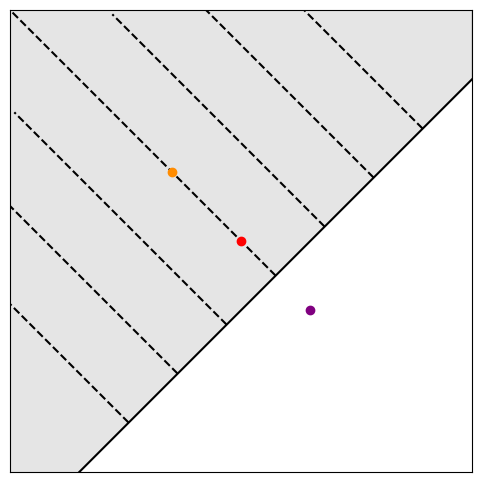

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

p_r = np.array([0, 0])
p_o = np.array([-3, 3])
p_p = np.array([3, -3])

def calculate_bisector(p1, p2):
    midpoint = (p1 + p2) / 2

    if p2[0] - p1[0] != 0:
        slope_segment = (p2[1] - p1[1]) / (p2[0] - p1[0])
        slope_perpendicular = -1 / slope_segment
    else:
        slope_perpendicular = 0

    intercept = midpoint[1] - slope_perpendicular * midpoint[0]

    return slope_perpendicular, intercept, midpoint

def fill_half_plane(slope, intercept, color, axis):
    x = np.linspace(-10, 10, 1000)
    y = slope * x + intercept
    axis.fill_between(x, y, 10, where=(y < 10), color=color, alpha=0.2)

bisector_pr_pv, intercept_pr_pv, midpoint_pr_pv = calculate_bisector(p_r, p_p)
bisector_pr_po, intercept_pr_po, midpoint_pr_po = calculate_bisector(p_r, p_o)

distance = 9

def calculate_perpendicular_point(point, slope, distance, scale_factor):
    if slope == 0:
        perpendicular_point_1 = point + np.array([0, distance * scale_factor])
        perpendicular_point_2 = point + np.array([0, -distance * scale_factor])
    else:
        perpendicular_slope = -1 / slope
        direction_vector = np.array([1, perpendicular_slope])
        direction_vector /= np.linalg.norm(direction_vector)
        perpendicular_point_1 = point + direction_vector * distance * scale_factor
        perpendicular_point_2 = point - direction_vector * distance * scale_factor

    return perpendicular_point_1, perpendicular_point_2

def calculate_distant_point(slope, intercept, midpoint, distance):
    if slope == 0:
        point_1 = midpoint + np.array([distance, 0])
        point_2 = midpoint - np.array([distance, 0])
    else:
        angle = np.arctan(slope)
        x_offset = distance * np.cos(angle)
        y_offset = distance * np.sin(angle)
        point_1 = midpoint + np.array([x_offset, y_offset])
        point_2 = midpoint - np.array([x_offset, y_offset])

    return point_1, point_2

point_1_pr_po, point_2_pr_po = calculate_distant_point(bisector_pr_po, intercept_pr_po, midpoint_pr_po, distance)
point_3_pr_po = midpoint_pr_po + (point_1_pr_po - midpoint_pr_po) * 1/3
point_4_pr_po = midpoint_pr_po + (point_1_pr_po - midpoint_pr_po) * 2/3
point_5_pr_po = midpoint_pr_po + (point_2_pr_po - midpoint_pr_po) * 1/3
point_6_pr_po = midpoint_pr_po + (point_2_pr_po - midpoint_pr_po) * 2/3

def calculate_half_line_points(point, slope, scale_factor):
    if slope == 0:
        point_close = point + np.array([1, 0]) * scale_factor
        point_far = point + np.array([-1, 0]) * scale_factor
    else:
        perpendicular_slope = -1 / slope
        direction_vector = np.array([1, perpendicular_slope])
        direction_vector /= np.linalg.norm(direction_vector)
        point_close = point + direction_vector * scale_factor
        point_far = point - direction_vector * scale_factor

    if np.linalg.norm(point_close - p_r) < np.linalg.norm(point_far - p_r):
        return point, point_close
    else:
        return point, point_far

scale_factor = 13
half_line_points = [
    calculate_half_line_points(point_1_pr_pv, bisector_pr_pv, scale_factor),
    calculate_half_line_points(point_2_pr_pv, bisector_pr_pv, scale_factor),
    calculate_half_line_points(point_3_pr_pv, bisector_pr_pv, scale_factor),
    calculate_half_line_points(point_4_pr_pv, bisector_pr_pv, scale_factor),
    calculate_half_line_points(point_5_pr_pv, bisector_pr_pv, scale_factor),
    calculate_half_line_points(point_6_pr_pv, bisector_pr_pv, scale_factor),
]

x_values = np.linspace(-10, 10, 400)

line_pr_pv = bisector_pr_pv * x_values + intercept_pr_pv

fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(x_values, line_pr_pv, color='black', label='-')

def fill_half_plane(slope, intercept, color, axis, alpha=1):
    x = np.linspace(-10, 10, 1000)
    y = slope * x + intercept
    axis.fill_between(x, y, 10, where=(y < 10), color=color, alpha=alpha)

fill_half_plane(bisector_pr_pv, intercept_pr_pv, 'black', ax, alpha=0.1)


for i in range(6):
    color = 'black'
    linestyle = '--'
    plt.plot([half_line_points[i][0][0], half_line_points[i][1][0]],
             [half_line_points[i][0][1], half_line_points[i][1][1]], color=color, linestyle=linestyle)

perpendicular_point_pr_pv_1, perpendicular_point_pr_pv_2 = calculate_perpendicular_point(midpoint_pr_pv, bisector_pr_pv, distance, scale_factor)

plt.plot([midpoint_pr_pv[0], perpendicular_point_pr_pv_2[0]], [midpoint_pr_pv[1], perpendicular_point_pr_pv_2[1]], color='black', linestyle='--')

plt.plot(p_r[0], p_r[1], 'ro')
plt.plot(p_o[0], p_o[1], color='#FF8C00', marker='o')
plt.plot(p_p[0], p_p[1], color='#800080', marker='o')

plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.gca().set_aspect('equal', adjustable='box')


plt.legend().remove()
plt.xticks([])
plt.yticks([])
plt.show()


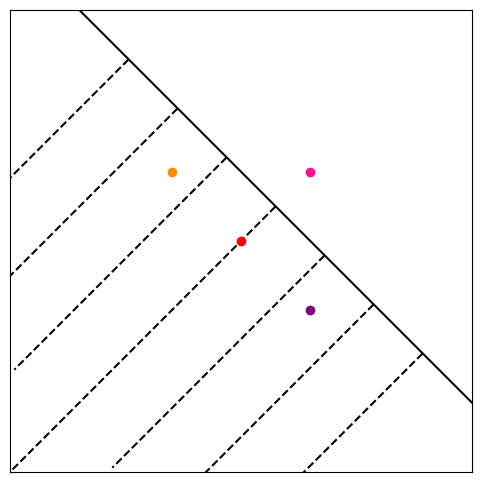

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

p_r = np.array([0, 0])
p_o = np.array([-3, 3])

p_v = np.array([3, 3])
p_new = np.array([3, -3])


def calculate_bisector(p1, p2):
    midpoint = (p1 + p2) / 2

    # Calculate the slope of the line segment
    if p2[0] - p1[0] != 0:  # Avoid division by zero
        slope_segment = (p2[1] - p1[1]) / (p2[0] - p1[0])
        # Calculate the slope of the perpendicular line
        slope_perpendicular = -1 / slope_segment
    else: # if p2[0] - p1[0] == 0, the bisector is a horizontal line
        slope_perpendicular = 0

    # Calculate the y-intercept of the perpendicular line
    intercept = midpoint[1] - slope_perpendicular * midpoint[0]

    return slope_perpendicular, intercept, midpoint

def calculate_perpendicular_point(point, slope, distance, scale_factor):
    if slope == 0:
        perpendicular_point_1 = point + np.array([0, distance * scale_factor])
        perpendicular_point_2 = point + np.array([0, -distance * scale_factor])
    else:
        perpendicular_slope = -1 / slope
        direction_vector = np.array([1, perpendicular_slope])
        direction_vector /= np.linalg.norm(direction_vector)
        perpendicular_point_1 = point + direction_vector * distance * scale_factor
        perpendicular_point_2 = point - direction_vector * distance * scale_factor

    return perpendicular_point_1, perpendicular_point_2

bisector_pr_pv, intercept_pr_pv, midpoint_pr_pv = calculate_bisector(p_r, p_v)
bisector_pr_po, intercept_pr_po, midpoint_pr_po = calculate_bisector(p_r, p_o)

distance = 9

def calculate_distant_point(slope, intercept, midpoint, distance):
    if slope == 0:
        point_1 = midpoint + np.array([distance, 0])
        point_2 = midpoint - np.array([distance, 0])
    else:
        angle = np.arctan(slope)
        x_offset = distance * np.cos(angle)
        y_offset = distance * np.sin(angle)
        point_1 = midpoint + np.array([x_offset, y_offset])
        point_2 = midpoint - np.array([x_offset, y_offset])

    return point_1, point_2

point_1_pr_pv, point_2_pr_pv = calculate_distant_point(bisector_pr_pv, intercept_pr_pv, midpoint_pr_pv, distance)


point_3_pr_pv = midpoint_pr_pv + (point_1_pr_pv - midpoint_pr_pv) * 1/3
point_4_pr_pv = midpoint_pr_pv + (point_1_pr_pv - midpoint_pr_pv) * 2/3
point_5_pr_pv = midpoint_pr_pv + (point_2_pr_pv - midpoint_pr_pv) * 1/3
point_6_pr_pv = midpoint_pr_pv + (point_2_pr_pv - midpoint_pr_pv) * 2/3


def calculate_half_line_points(point, slope, scale_factor):
    if slope == 0:
        point_close = point + np.array([1, 0]) * scale_factor
        point_far = point + np.array([-1, 0]) * scale_factor
    else:
        perpendicular_slope = -1 / slope
        direction_vector = np.array([1, perpendicular_slope])
        direction_vector /= np.linalg.norm(direction_vector)
        point_close = point + direction_vector * scale_factor
        point_far = point - direction_vector * scale_factor

    if np.linalg.norm(point_close - p_r) < np.linalg.norm(point_far - p_r):
        return point, point_close
    else:
        return point, point_far
scale_factor = 13
half_line_points = [
    calculate_half_line_points(point_1_pr_pv, bisector_pr_pv, scale_factor),
    calculate_half_line_points(point_2_pr_pv, bisector_pr_pv, scale_factor),
    calculate_half_line_points(point_3_pr_pv, bisector_pr_pv, scale_factor),
    calculate_half_line_points(point_4_pr_pv, bisector_pr_pv, scale_factor),
    calculate_half_line_points(point_5_pr_pv, bisector_pr_pv, scale_factor),
    calculate_half_line_points(point_6_pr_pv, bisector_pr_pv, scale_factor),

]

half_line_midpoint_pr_pv = calculate_half_line_points(midpoint_pr_pv, bisector_pr_pv, 1.5)
half_line_midpoint_pr_po = calculate_half_line_points(midpoint_pr_po, bisector_pr_po, 1.5)

x_values = np.linspace(-10, 10, 400)

line_pr_pv = bisector_pr_pv * x_values + intercept_pr_pv
line_pr_po = bisector_pr_po * x_values + intercept_pr_po

fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(x_values, line_pr_pv, color='#000000', label='-')


for i in range(6):
    if i < 6:
        color = 'black'
        linestyle = '--'
    else:
        color = '#800080'
        linestyle = '--'
    plt.plot([half_line_points[i][0][0], half_line_points[i][1][0]],
             [half_line_points[i][0][1], half_line_points[i][1][1]], color=color, linestyle=linestyle)

perpendicular_point_pr_pv_1, perpendicular_point_pr_pv_2 = calculate_perpendicular_point(midpoint_pr_pv, bisector_pr_pv, distance, scale_factor)
perpendicular_point_pr_po_1, perpendicular_point_pr_po_2 = calculate_perpendicular_point(midpoint_pr_po, bisector_pr_po, distance, scale_factor)

plt.plot([midpoint_pr_pv[0], perpendicular_point_pr_pv_2[0]], [midpoint_pr_pv[1], perpendicular_point_pr_pv_2[1]], color='black', linestyle='--')

plt.plot(p_r[0], p_r[1], 'ro')
plt.plot(p_o[0], p_o[1], color='#FF8C00', marker='o')
plt.plot(p_v[0], p_v[1], color='#FF0D95', marker='o')
plt.plot(p_new[0], p_new[1], color='#800080', marker='o')

plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend().remove()
plt.xticks([])
plt.yticks([])
plt.show()

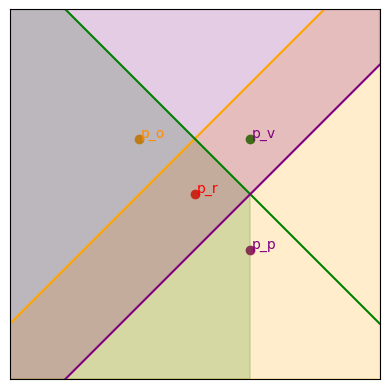

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

p_r = np.array([0, 0])
p_o = np.array([-3, 3])
p_v = np.array([3, 3])
p_p = np.array([3, -3])

def calculate_bisector(p1, p2):
    midpoint = (p1 + p2) / 2
    # Calculate the slope of the line segment if p2[0] - p1[0] != 0:
    # Avoid division by zero
    if p2[0] - p1[0] != 0:
        # Calculate the slope of the line segment
        slope_segment = (p2[1] - p1[1]) / (p2[0] - p1[0])
        # Calculate the slope of the perpendicular line
        slope_perpendicular = -1 / slope_segment
    else:
        # if p2[0] - p1[0] == 0, the bisector is a horizontal line
        slope_perpendicular = 0
    # Calculate the y-intercept of the perpendicular line
    intercept = midpoint[1] - slope_perpendicular * midpoint[0]
    return slope_perpendicular, intercept, midpoint

# Calcul des médiatrices
slope_ro, intercept_ro, midpoint_ro = calculate_bisector(p_r, p_o)
slope_rv, intercept_rv, midpoint_rv = calculate_bisector(p_r, p_v)
slope_rp, intercept_rp, midpoint_rp = calculate_bisector(p_r, p_p)


plt.figure()


plt.scatter(*p_r, color='red', label='p_r')
plt.scatter(*p_o, color='orange', label='p_o')
plt.scatter(*p_v, color='green', label='p_v')
plt.scatter(*p_p, color='purple', label='p_p')


x = np.linspace(-10, 10, 1000)
plt.plot(x, slope_ro * x + intercept_ro, color='orange', linestyle='-', label='Médiatrice r-o')
plt.plot(x, slope_rv * x + intercept_rv, color='green', linestyle='-', label='Médiatrice r-v')
plt.plot(x, slope_rp * x + intercept_rp, color='purple', linestyle='-', label='Médiatrice r-p')


y_rv = slope_rv * x + intercept_rv
y_ro = slope_ro * x + intercept_ro
y_rp = slope_rp * x + intercept_rp

plt.fill_between(x, y_rv, -10, where=y_rv > 0, color='green', alpha=0.2)
plt.fill_between(x, y_ro, -10, where=(y_ro>-10), color='orange', alpha=0.2)
plt.fill_between(x, y_rp, 10, where=(y_rp<10), color='purple', alpha=0.2)

plt.grid(True)
plt.axis('scaled')
plt.xlim(-10, 10)
plt.ylim(-10, 10)

# Ajout des étiquettes sur les points
plt.text(p_r[0] + 0.1, p_r[1] + 0.1, 'p_r', color='r')
plt.text(p_o[0] + 0.1, p_o[1] + 0.1, 'p_o', color='#FF8C00')
plt.text(p_v[0] + 0.1, p_v[1] + 0.1, 'p_v', color='#800080')
plt.text(p_p[0] + 0.1, p_p[1] + 0.1, 'p_p', color='#800080')

# Suppression de la légende
plt.legend().remove()


plt.xticks([])
plt.yticks([])

plt.savefig('TroisPoints.svg')
plt.show()

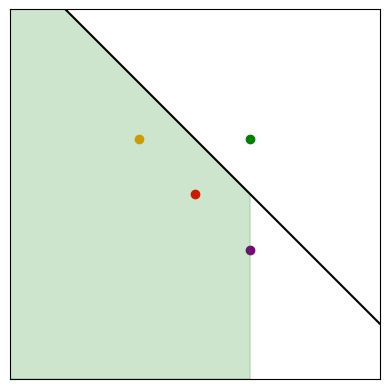

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

p_r = np.array([0, 0])
p_o = np.array([-3, 3])
p_v = np.array([3, 3])
p_p = np.array([3, -3])

def calculate_bisector(p1, p2):
    midpoint = (p1 + p2) / 2

    if p2[0] - p1[0] != 0:

        slope_segment = (p2[1] - p1[1]) / (p2[0] - p1[0])

        slope_perpendicular = -1 / slope_segment
    else:

        slope_perpendicular = 0

    intercept = midpoint[1] - slope_perpendicular * midpoint[0]
    return slope_perpendicular, intercept, midpoint

slope_rv, intercept_rv, midpoint_rv = calculate_bisector(p_r, p_v)

plt.figure()

plt.scatter(*p_r, color='red', label='p_r')
plt.scatter(*p_o, color='orange', label='p_o')
plt.scatter(*p_v, color='green', label='p_v')
plt.scatter(*p_p, color='purple', label='p_p')

x = np.linspace(-10, 10, 1000)

plt.plot(x, slope_rv * x + intercept_rv, color='black', linestyle='-', label='Médiatrice r-v')


#FILL
y_rv = slope_rv * x + intercept_rv

plt.fill_between(x, y_rv, -10, where=y_rv > 0, color='green', alpha=0.2)


plt.grid(True)
plt.axis('scaled')
plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.legend().remove()
plt.xticks([])
plt.yticks([])
plt.show()

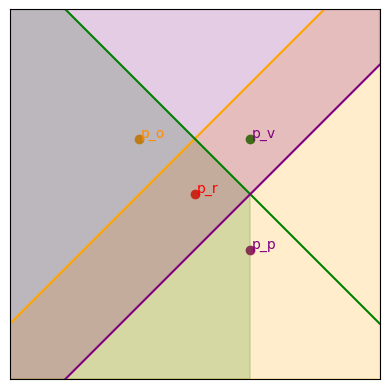

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

p_r = np.array([0, 0])
p_o = np.array([-3, 3])
p_v = np.array([3, 3])
p_p = np.array([3, -3])

def calculate_bisector(p1, p2):
    midpoint = (p1 + p2) / 2
    # Calculate the slope of the line segment if p2[0] - p1[0] != 0:
    # Avoid division by zero
    if p2[0] - p1[0] != 0:
        # Calculate the slope of the line segment
        slope_segment = (p2[1] - p1[1]) / (p2[0] - p1[0])
        # Calculate the slope of the perpendicular line
        slope_perpendicular = -1 / slope_segment
    else:
        # if p2[0] - p1[0] == 0, the bisector is a horizontal line
        slope_perpendicular = 0
    # Calculate the y-intercept of the perpendicular line
    intercept = midpoint[1] - slope_perpendicular * midpoint[0]
    return slope_perpendicular, intercept, midpoint

# Calcul des médiatrices
slope_ro, intercept_ro, midpoint_ro = calculate_bisector(p_r, p_o)
slope_rv, intercept_rv, midpoint_rv = calculate_bisector(p_r, p_v)
slope_rp, intercept_rp, midpoint_rp = calculate_bisector(p_r, p_p)

# Création du graphique
plt.figure()

# Ajout des points
plt.scatter(*p_r, color='red', label='p_r')
plt.scatter(*p_o, color='orange', label='p_o')
plt.scatter(*p_v, color='green', label='p_v')
plt.scatter(*p_p, color='purple', label='p_p')

# Ajout des médiatrices
x = np.linspace(-10, 10, 1000)
plt.plot(x, slope_ro * x + intercept_ro, color='orange', linestyle='-', label='Médiatrice r-o')
plt.plot(x, slope_rv * x + intercept_rv, color='green', linestyle='-', label='Médiatrice r-v')
plt.plot(x, slope_rp * x + intercept_rp, color='purple', linestyle='-', label='Médiatrice r-p')

# Remplissage des demi-plans
y_rv = slope_rv * x + intercept_rv
y_ro = slope_ro * x + intercept_ro
y_rp = slope_rp * x + intercept_rp

plt.fill_between(x, y_rv, -10, where=y_rv > 0, color='green', alpha=0.2)
plt.fill_between(x, y_ro, -10, where=(y_ro>-10), color='orange', alpha=0.2)
plt.fill_between(x, y_rp, 10, where=(y_rp<10), color='purple', alpha=0.2)

plt.grid(True)
plt.axis('scaled')
plt.xlim(-10, 10)
plt.ylim(-10, 10)

# Ajout des étiquettes sur les points
plt.text(p_r[0] + 0.1, p_r[1] + 0.1, 'p_r', color='r')
plt.text(p_o[0] + 0.1, p_o[1] + 0.1, 'p_o', color='#FF8C00')
plt.text(p_v[0] + 0.1, p_v[1] + 0.1, 'p_v', color='#800080')
plt.text(p_p[0] + 0.1, p_p[1] + 0.1, 'p_p', color='#800080')

# Suppression de la légende
plt.legend().remove()


plt.xticks([])
plt.yticks([])

plt.show()

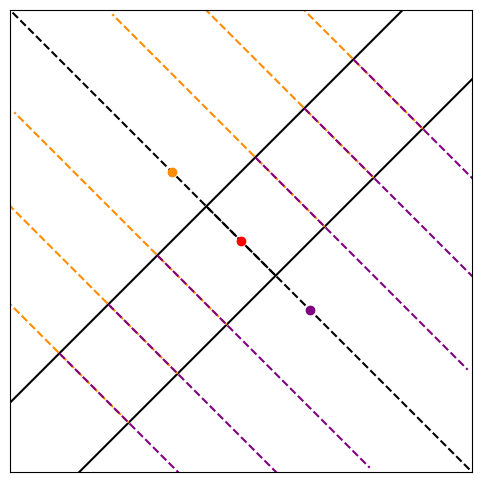

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

p_r = np.array([0, 0])
p_o = np.array([-3, 3])
p_v = np.array([3, -3])

def calculate_bisector(p1, p2):
    midpoint = (p1 + p2) / 2

    # Calculate the slope of the line segment
    if p2[0] - p1[0] != 0:  # Avoid division by zero
        slope_segment = (p2[1] - p1[1]) / (p2[0] - p1[0])
        # Calculate the slope of the perpendicular line
        slope_perpendicular = -1 / slope_segment
    else: # if p2[0] - p1[0] == 0, the bisector is a horizontal line
        slope_perpendicular = 0

    # Calculate the y-intercept of the perpendicular line
    intercept = midpoint[1] - slope_perpendicular * midpoint[0]

    return slope_perpendicular, intercept, midpoint

def calculate_perpendicular_point(point, slope, distance, scale_factor):
    if slope == 0:
        perpendicular_point_1 = point + np.array([0, distance * scale_factor])
        perpendicular_point_2 = point + np.array([0, -distance * scale_factor])
    else:
        perpendicular_slope = -1 / slope
        direction_vector = np.array([1, perpendicular_slope])
        direction_vector /= np.linalg.norm(direction_vector)
        perpendicular_point_1 = point + direction_vector * distance * scale_factor
        perpendicular_point_2 = point - direction_vector * distance * scale_factor

    return perpendicular_point_1, perpendicular_point_2

bisector_pr_pv, intercept_pr_pv, midpoint_pr_pv = calculate_bisector(p_r, p_v)
bisector_pr_po, intercept_pr_po, midpoint_pr_po = calculate_bisector(p_r, p_o)

distance = 9

def calculate_distant_point(slope, intercept, midpoint, distance):
    if slope == 0:
        point_1 = midpoint + np.array([distance, 0])
        point_2 = midpoint - np.array([distance, 0])
    else:
        angle = np.arctan(slope)
        x_offset = distance * np.cos(angle)
        y_offset = distance * np.sin(angle)
        point_1 = midpoint + np.array([x_offset, y_offset])
        point_2 = midpoint - np.array([x_offset, y_offset])

    return point_1, point_2

point_1_pr_pv, point_2_pr_pv = calculate_distant_point(bisector_pr_pv, intercept_pr_pv, midpoint_pr_pv, distance)
point_1_pr_po, point_2_pr_po = calculate_distant_point(bisector_pr_po, intercept_pr_po, midpoint_pr_po, distance)

point_3_pr_pv = midpoint_pr_pv + (point_1_pr_pv - midpoint_pr_pv) * 1/3
point_4_pr_pv = midpoint_pr_pv + (point_1_pr_pv - midpoint_pr_pv) * 2/3
point_5_pr_pv = midpoint_pr_pv + (point_2_pr_pv - midpoint_pr_pv) * 1/3
point_6_pr_pv = midpoint_pr_pv + (point_2_pr_pv - midpoint_pr_pv) * 2/3

point_3_pr_po = midpoint_pr_po + (point_1_pr_po - midpoint_pr_po) * 1/3
point_4_pr_po = midpoint_pr_po + (point_1_pr_po - midpoint_pr_po) * 2/3
point_5_pr_po = midpoint_pr_po + (point_2_pr_po - midpoint_pr_po) * 1/3
point_6_pr_po = midpoint_pr_po + (point_2_pr_po - midpoint_pr_po) * 2/3

def calculate_half_line_points(point, slope, scale_factor):
    if slope == 0:
        point_close = point + np.array([1, 0]) * scale_factor
        point_far = point + np.array([-1, 0]) * scale_factor
    else:
        perpendicular_slope = -1 / slope
        direction_vector = np.array([1, perpendicular_slope])
        direction_vector /= np.linalg.norm(direction_vector)
        point_close = point + direction_vector * scale_factor
        point_far = point - direction_vector * scale_factor

    if np.linalg.norm(point_close - p_r) < np.linalg.norm(point_far - p_r):
        return point, point_close
    else:
        return point, point_far
scale_factor = 13
half_line_points = [
    calculate_half_line_points(point_1_pr_pv, bisector_pr_pv, scale_factor),
    calculate_half_line_points(point_2_pr_pv, bisector_pr_pv, scale_factor),
    calculate_half_line_points(point_3_pr_pv, bisector_pr_pv, scale_factor),
    calculate_half_line_points(point_4_pr_pv, bisector_pr_pv, scale_factor),
    calculate_half_line_points(point_5_pr_pv, bisector_pr_pv, scale_factor),
    calculate_half_line_points(point_6_pr_pv, bisector_pr_pv, scale_factor),
    calculate_half_line_points(point_1_pr_po, bisector_pr_po, scale_factor),
    calculate_half_line_points(point_2_pr_po, bisector_pr_po, scale_factor),
    calculate_half_line_points(point_3_pr_po, bisector_pr_po, scale_factor),
    calculate_half_line_points(point_4_pr_po, bisector_pr_po, scale_factor),
    calculate_half_line_points(point_5_pr_po, bisector_pr_po, scale_factor),
    calculate_half_line_points(point_6_pr_po, bisector_pr_po, scale_factor),
]

half_line_midpoint_pr_pv = calculate_half_line_points(midpoint_pr_pv, bisector_pr_pv, 1.5)
half_line_midpoint_pr_po = calculate_half_line_points(midpoint_pr_po, bisector_pr_po, 1.5)

x_values = np.linspace(-10, 10, 400)

line_pr_pv = bisector_pr_pv * x_values + intercept_pr_pv
line_pr_po = bisector_pr_po * x_values + intercept_pr_po

fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(x_values, line_pr_pv, color='#000000', label='-')
ax.plot(x_values, line_pr_po, color='#000000', label='-')

for i in range(12):
    if i < 6:
        color = '#FF8C00'
        linestyle = '--'
    else:
        color = '#800080'
        linestyle = '--'
    plt.plot([half_line_points[i][0][0], half_line_points[i][1][0]],
             [half_line_points[i][0][1], half_line_points[i][1][1]], color=color, linestyle=linestyle)

perpendicular_point_pr_pv_1, perpendicular_point_pr_pv_2 = calculate_perpendicular_point(midpoint_pr_pv, bisector_pr_pv, distance, scale_factor)
perpendicular_point_pr_po_1, perpendicular_point_pr_po_2 = calculate_perpendicular_point(midpoint_pr_po, bisector_pr_po, distance, scale_factor)

plt.plot([midpoint_pr_pv[0], perpendicular_point_pr_pv_2[0]], [midpoint_pr_pv[1], perpendicular_point_pr_pv_2[1]], color='black', linestyle='--')
plt.plot([midpoint_pr_po[0], perpendicular_point_pr_po_1[0]], [midpoint_pr_po[1], perpendicular_point_pr_po_1[1]], color='black', linestyle='--')


plt.plot(p_r[0], p_r[1], 'ro')
plt.plot(p_o[0], p_o[1], color='#FF8C00', marker='o')
plt.plot(p_v[0], p_v[1], color='#800080', marker='o')

plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.gca().set_aspect('equal', adjustable='box')


plt.legend().remove()
plt.xticks([])
plt.yticks([])
plt.savefig('TroisPoints.svg')
plt.show()


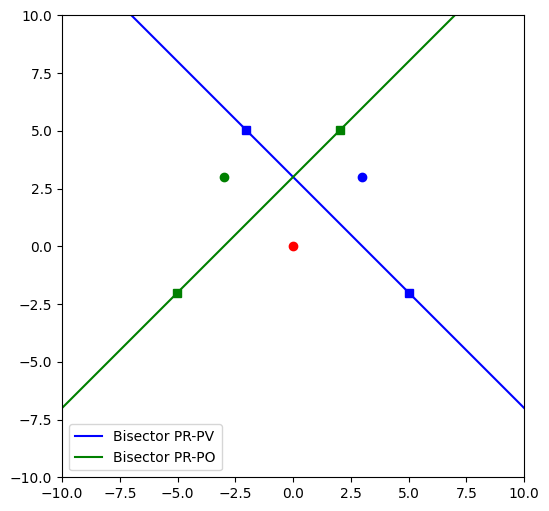

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define points pr, po, and pv
p_r = np.array([0, 0])
p_o = np.array([-3, 3])
p_v = np.array([3, 3])

# Function to calculate bisector
def calculate_bisector(p1, p2):
    # Calculate the midpoint
    midpoint = (p1 + p2) / 2

    # Calculate the slope of the line segment
    if p2[0] - p1[0] != 0:  # Avoid division by zero
        slope_segment = (p2[1] - p1[1]) / (p2[0] - p1[0])
        # Calculate the slope of the perpendicular line
        slope_perpendicular = -1 / slope_segment
    else: # if p2[0] - p1[0] == 0, the bisector is a horizontal line
        slope_perpendicular = 0

    # Calculate the y-intercept of the perpendicular line
    intercept = midpoint[1] - slope_perpendicular * midpoint[0]

    return slope_perpendicular, intercept, midpoint

# Calculate the bisectors and midpoints
bisector_pr_pv, intercept_pr_pv, midpoint_pr_pv = calculate_bisector(p_r, p_v)
bisector_pr_po, intercept_pr_po, midpoint_pr_po = calculate_bisector(p_r, p_o)

# Define the distance from midpoints
distance = 5

# Calculate the distant points on the bisectors
def calculate_distant_point(slope, intercept, midpoint, distance):
    if slope == 0:
        point_1 = midpoint + np.array([distance, 0])
        point_2 = midpoint - np.array([distance, 0])
    else:
        angle = np.arctan(slope)
        x_offset = distance * np.cos(angle)
        y_offset = distance * np.sin(angle)
        point_1 = midpoint + np.array([x_offset, y_offset])
        point_2 = midpoint - np.array([x_offset, y_offset])

    return point_1, point_2

point_1_pr_pv, point_2_pr_pv = calculate_distant_point(bisector_pr_pv, intercept_pr_pv, midpoint_pr_pv, distance)
point_1_pr_po, point_2_pr_po = calculate_distant_point(bisector_pr_po, intercept_pr_po, midpoint_pr_po, distance)

# Create a grid range for x
x_values = np.linspace(-10, 10, 400)

# Create the bisector lines
line_pr_pv = bisector_pr_pv * x_values + intercept_pr_pv
line_pr_po = bisector_pr_po * x_values + intercept_pr_po

# Create the plot
fig, ax = plt.subplots(figsize=(6, 6))

# Plot the bisectors
ax.plot(x_values, line_pr_pv, 'b-', label='Bisector PR-PV')
ax.plot(x_values, line_pr_po, 'g-', label='Bisector PR-PO')

# Visualize points pr, po, and pv
plt.plot(p_r[0], p_r[1], 'ro')  # pr in red
plt.plot(p_o[0], p_o[1], 'go')  # po in green
plt.plot(p_v[0], p_v[1], 'bo')  # pv in blue

# Visualize distant points on the bisectors
plt.plot(point_1_pr_pv[0], point_1_pr_pv[1], 'bs')
plt.plot(point_2_pr_pv[0], point_2_pr_pv[1], 'bs')
plt.plot(point_1_pr_po[0], point_1_pr_po[1], 'gs')
plt.plot(point_2_pr_po[0], point_2_pr_po[1], 'gs')

plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()


NameError: name 'calculate_perpendicular_points' is not defined

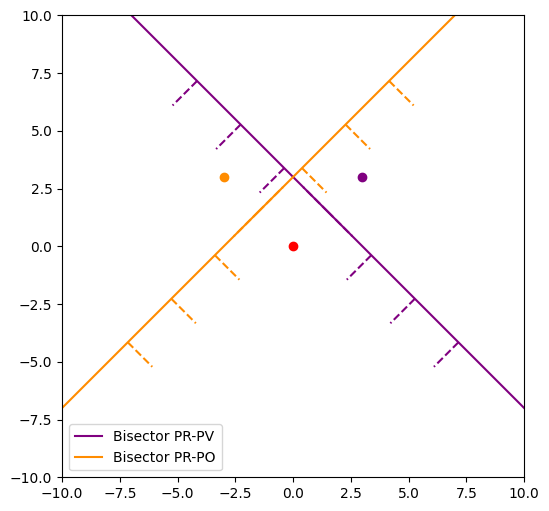

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define points pr, po, and pv
p_r = np.array([0, 0])
p_o = np.array([-3, 3])
p_v = np.array([3, 3])

# Function to calculate bisector
def calculate_bisector(p1, p2):
    # Calculate the midpoint
    midpoint = (p1 + p2) / 2

    # Calculate the slope of the line segment
    if p2[0] - p1[0] != 0:  # Avoid division by zero
        slope_segment = (p2[1] - p1[1]) / (p2[0] - p1[0])
        # Calculate the slope of the perpendicular line
        slope_perpendicular = -1 / slope_segment
    else: # if p2[0] - p1[0] == 0, the bisector is a horizontal line
        slope_perpendicular = 0

    # Calculate the y-intercept of the perpendicular line
    intercept = midpoint[1] - slope_perpendicular * midpoint[0]

    return slope_perpendicular, intercept, midpoint

# Calculate the bisectors and midpoints
bisector_pr_pv, intercept_pr_pv, midpoint_pr_pv = calculate_bisector(p_r, p_v)
bisector_pr_po, intercept_pr_po, midpoint_pr_po = calculate_bisector(p_r, p_o)

distance = 8

# Calculate the distant points on the bisectors
def calculate_distant_point(slope, intercept, midpoint, distance):
    if slope == 0:
        point_1 = midpoint + np.array([distance, 0])
        point_2 = midpoint - np.array([distance, 0])
    else:
        angle = np.arctan(slope)
        x_offset = distance * np.cos(angle)
        y_offset = distance * np.sin(angle)
        point_1 = midpoint + np.array([x_offset, y_offset])
        point_2 = midpoint - np.array([x_offset, y_offset])

    return point_1, point_2

point_1_pr_pv, point_2_pr_pv = calculate_distant_point(bisector_pr_pv, intercept_pr_pv, midpoint_pr_pv, distance)
point_1_pr_po, point_2_pr_po = calculate_distant_point(bisector_pr_po, intercept_pr_po, midpoint_pr_po, distance)

# Calculate the new points for pr_pv
point_3_pr_pv = midpoint_pr_pv + (point_1_pr_pv - midpoint_pr_pv) * 1/3
point_4_pr_pv = midpoint_pr_pv + (point_1_pr_pv - midpoint_pr_pv) * 2/3
point_5_pr_pv = midpoint_pr_pv + (point_2_pr_pv - midpoint_pr_pv) * 1/3
point_6_pr_pv = midpoint_pr_pv + (point_2_pr_pv - midpoint_pr_pv) * 2/3

# Calculate the new points for pr_po
point_3_pr_po = midpoint_pr_po + (point_1_pr_po - midpoint_pr_po) * 1/3
point_4_pr_po = midpoint_pr_po + (point_1_pr_po - midpoint_pr_po) * 2/3
point_5_pr_po = midpoint_pr_po + (point_2_pr_po - midpoint_pr_po) * 1/3
point_6_pr_po = midpoint_pr_po + (point_2_pr_po - midpoint_pr_po) * 2/3

def calculate_half_line_points(point, slope, scale_factor=1.5):
    if slope == 0:
        point_close = point + np.array([1, 0]) * scale_factor
        point_far = point + np.array([-1, 0]) * scale_factor
    else:
        perpendicular_slope = -1 / slope
        direction_vector = np.array([1, perpendicular_slope])
        direction_vector /= np.linalg.norm(direction_vector)
        direction_vector *= scale_factor
        point_close = point + direction_vector
        point_far = point - direction_vector

    if np.linalg.norm(point_close - p_r) < np.linalg.norm(point_far - p_r):
        return point, point_close
    else:
        return point, point_far

def calculate_perpendicular_points(midpoint, slope_perpendicular, distance, scale_factor):
    direction_vector = np.array([1, slope_perpendicular])
    direction_vector /= np.linalg.norm(direction_vector)
    direction_vector *= distance * scale_factor

    perpendicular_point_1 = midpoint + direction_vector
    perpendicular_point_2 = midpoint - direction_vector

    return perpendicular_point_1, perpendicular_point_2

half_line_points = [
    calculate_half_line_points(point_1_pr_pv, bisector_pr_pv),
    calculate_half_line_points(point_2_pr_pv, bisector_pr_pv),
    calculate_half_line_points(point_3_pr_pv, bisector_pr_pv),
    calculate_half_line_points(point_4_pr_pv, bisector_pr_pv),
    calculate_half_line_points(point_5_pr_pv, bisector_pr_pv),
    calculate_half_line_points(point_6_pr_pv, bisector_pr_pv),
    calculate_half_line_points(point_1_pr_po, bisector_pr_po),
    calculate_half_line_points(point_2_pr_po, bisector_pr_po),
    calculate_half_line_points(point_3_pr_po, bisector_pr_po),
    calculate_half_line_points(point_4_pr_po, bisector_pr_po),
    calculate_half_line_points(point_5_pr_po, bisector_pr_po),
    calculate_half_line_points(point_6_pr_po, bisector_pr_po),
]

half_line_midpoint_pr_pv = calculate_half_line_points(midpoint_pr_pv, bisector_pr_pv)
half_line_midpoint_pr_po = calculate_half_line_points(midpoint_pr_po, bisector_pr_po)

x_values = np.linspace(-10, 10, 400)

line_pr_pv = bisector_pr_pv * x_values + intercept_pr_pv
line_pr_po = bisector_pr_po * x_values + intercept_pr_po

fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(x_values, line_pr_pv, color='#800080', label='Bisector PR-PV')
ax.plot(x_values, line_pr_po, color='#FF8C00', label='Bisector PR-PO')

for i in range(12):
    if i < 6:
        color = '#800080'
        linestyle = '--'
    else:
        color = '#FF8C00'
        linestyle = '--'
    plt.plot([half_line_points[i][0][0], half_line_points[i][1][0]],
             [half_line_points[i][0][1], half_line_points[i][1][1]], color=color, linestyle=linestyle)

# Add the following lines for the perpendicular segments
perpendicular_point_pr_pv_1, perpendicular_point_pr_pv_2 = calculate_perpendicular_points(midpoint_pr_pv, bisector_pr_pv, 1, scale_factor=1.5)
perpendicular_point_pr_po_1, perpendicular_point_pr_po_2 = calculate_perpendicular_points(midpoint_pr_po, bisector_pr_po, 1, scale_factor=1.5)

plt.plot([midpoint_pr_pv[0], perpendicular_point_pr_pv_1[0]], [midpoint_pr_pv[1], perpendicular_point_pr_pv_1[1]], color='#800080', linestyle='--')
plt.plot([midpoint_pr_pv[0], perpendicular_point_pr_pv_2[0]], [midpoint_pr_pv[1], perpendicular_point_pr_pv_2[1]], color='#800080', linestyle='--')
plt.plot([midpoint_pr_po[0], perpendicular_point_pr_po_1[0]], [midpoint_pr_po[1], perpendicular_point_pr_po_1[1]], color='#FF8C00', linestyle='--')
plt.plot([midpoint_pr_po[0], perpendicular_point_pr_po_2[0]], [midpoint_pr_po[1], perpendicular_point_pr_po_2[1]], color='#FF8C00', linestyle='--')

plt.plot(p_r[0], p_r[1], 'ro')
plt.plot(p_o[0], p_o[1], color='#FF8C00', marker='o')
plt.plot(p_v[0], p_v[1], color='#800080', marker='o')

plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()


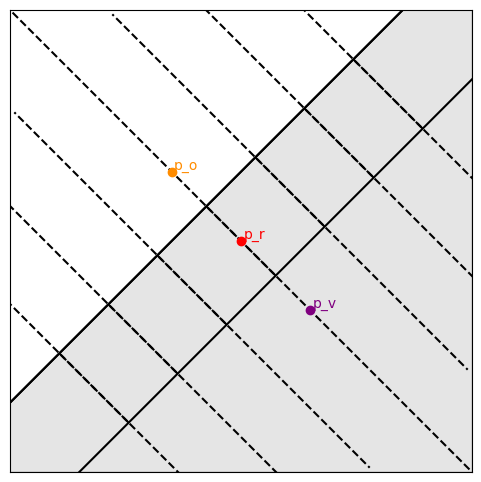

In [ ]:


p_r = np.array([0, 0])
p_o = np.array([-3, 3])
p_v = np.array([3, -3])

def calculate_bisector(p1, p2):
    midpoint = (p1 + p2) / 2

    # Calculate the slope of the line segment
    if p2[0] - p1[0] != 0:  # Avoid division by zero
        slope_segment = (p2[1] - p1[1]) / (p2[0] - p1[0])
        # Calculate the slope of the perpendicular line
        slope_perpendicular = -1 / slope_segment
    else: # if p2[0] - p1[0] == 0, the bisector is a horizontal line
        slope_perpendicular = 0

    # Calculate the y-intercept of the perpendicular line
    intercept = midpoint[1] - slope_perpendicular * midpoint[0]

    return slope_perpendicular, intercept, midpoint

def calculate_perpendicular_point(point, slope, distance, scale_factor):
    if slope == 0:
        perpendicular_point_1 = point + np.array([0, distance * scale_factor])
        perpendicular_point_2 = point + np.array([0, -distance * scale_factor])
    else:
        perpendicular_slope = -1 / slope
        direction_vector = np.array([1, perpendicular_slope])
        direction_vector /= np.linalg.norm(direction_vector)
        perpendicular_point_1 = point + direction_vector * distance * scale_factor
        perpendicular_point_2 = point - direction_vector * distance * scale_factor

    return perpendicular_point_1, perpendicular_point_2

bisector_pr_pv, intercept_pr_pv, midpoint_pr_pv = calculate_bisector(p_r, p_v)
bisector_pr_po, intercept_pr_po, midpoint_pr_po = calculate_bisector(p_r, p_o)

distance = 9

def calculate_distant_point(slope, intercept, midpoint, distance):
    if slope == 0:
        point_1 = midpoint + np.array([distance, 0])
        point_2 = midpoint - np.array([distance, 0])
    else:
        angle = np.arctan(slope)
        x_offset = distance * np.cos(angle)
        y_offset = distance * np.sin(angle)
        point_1 = midpoint + np.array([x_offset, y_offset])
        point_2 = midpoint - np.array([x_offset, y_offset])

    return point_1, point_2

point_1_pr_pv, point_2_pr_pv = calculate_distant_point(bisector_pr_pv, intercept_pr_pv, midpoint_pr_pv, distance)
point_1_pr_po, point_2_pr_po = calculate_distant_point(bisector_pr_po, intercept_pr_po, midpoint_pr_po, distance)

point_3_pr_pv = midpoint_pr_pv + (point_1_pr_pv - midpoint_pr_pv) * 1/3
point_4_pr_pv = midpoint_pr_pv + (point_1_pr_pv - midpoint_pr_pv) * 2/3
point_5_pr_pv = midpoint_pr_pv + (point_2_pr_pv - midpoint_pr_pv) * 1/3
point_6_pr_pv = midpoint_pr_pv + (point_2_pr_pv - midpoint_pr_pv) * 2/3

point_3_pr_po = midpoint_pr_po + (point_1_pr_po - midpoint_pr_po) * 1/3
point_4_pr_po = midpoint_pr_po + (point_1_pr_po - midpoint_pr_po) * 2/3
point_5_pr_po = midpoint_pr_po + (point_2_pr_po - midpoint_pr_po) * 1/3
point_6_pr_po = midpoint_pr_po + (point_2_pr_po - midpoint_pr_po) * 2/3

def calculate_half_line_points(point, slope, scale_factor):
    if slope == 0:
        point_close = point + np.array([1, 0]) * scale_factor
        point_far = point + np.array([-1, 0]) * scale_factor
    else:
        perpendicular_slope = -1 / slope
        direction_vector = np.array([1, perpendicular_slope])
        direction_vector /= np.linalg.norm(direction_vector)
        point_close = point + direction_vector * scale_factor
        point_far = point - direction_vector * scale_factor

    if np.linalg.norm(point_close - p_r) < np.linalg.norm(point_far - p_r):
        return point, point_close
    else:
        return point, point_far
scale_factor = 13
half_line_points = [
    calculate_half_line_points(point_1_pr_pv, bisector_pr_pv, scale_factor),
    calculate_half_line_points(point_2_pr_pv, bisector_pr_pv, scale_factor),
    calculate_half_line_points(point_3_pr_pv, bisector_pr_pv, scale_factor),
    calculate_half_line_points(point_4_pr_pv, bisector_pr_pv, scale_factor),
    calculate_half_line_points(point_5_pr_pv, bisector_pr_pv, scale_factor),
    calculate_half_line_points(point_6_pr_pv, bisector_pr_pv, scale_factor),
    calculate_half_line_points(point_1_pr_po, bisector_pr_po, scale_factor),
    calculate_half_line_points(point_2_pr_po, bisector_pr_po, scale_factor),
    calculate_half_line_points(point_3_pr_po, bisector_pr_po, scale_factor),
    calculate_half_line_points(point_4_pr_po, bisector_pr_po, scale_factor),
    calculate_half_line_points(point_5_pr_po, bisector_pr_po, scale_factor),
    calculate_half_line_points(point_6_pr_po, bisector_pr_po, scale_factor),
]

half_line_midpoint_pr_pv = calculate_half_line_points(midpoint_pr_pv, bisector_pr_pv, 1.5)
half_line_midpoint_pr_po = calculate_half_line_points(midpoint_pr_po, bisector_pr_po, 1.5)

x_values = np.linspace(-10, 10, 400)

line_pr_pv = bisector_pr_pv * x_values + intercept_pr_pv
line_pr_po = bisector_pr_po * x_values + intercept_pr_po

fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(x_values, line_pr_pv, color='#000000', label='-')
ax.plot(x_values, line_pr_po, color='#000000', label='-')


def calculate_half_line_points(point, slope, scale_factor):
    if slope == 0:
        point_close = point + np.array([1, 0]) * scale_factor
        point_far = point + np.array([-1, 0]) * scale_factor
    else:
        perpendicular_slope = -1 / slope
        direction_vector = np.array([1, perpendicular_slope])
        direction_vector /= np.linalg.norm(direction_vector)
        point_close = point + direction_vector * scale_factor
        point_far = point - direction_vector * scale_factor

    if np.linalg.norm(point_close - p_r) < np.linalg.norm(point_far - p_r):
        return point, point_close
    else:
        return point, point_far

scale_factor = 13
half_line_points = [
    calculate_half_line_points(point_1_pr_pv, bisector_pr_pv, scale_factor),
    calculate_half_line_points(point_2_pr_pv, bisector_pr_pv, scale_factor),
    calculate_half_line_points(point_3_pr_pv, bisector_pr_pv, scale_factor),
    calculate_half_line_points(point_4_pr_pv, bisector_pr_pv, scale_factor),
    calculate_half_line_points(point_5_pr_pv, bisector_pr_pv, scale_factor),
    calculate_half_line_points(point_6_pr_pv, bisector_pr_pv, scale_factor),
    calculate_half_line_points(point_1_pr_po, bisector_pr_po, scale_factor),
    calculate_half_line_points(point_2_pr_po, bisector_pr_po, scale_factor),
    calculate_half_line_points(point_3_pr_po, bisector_pr_po, scale_factor),
    calculate_half_line_points(point_4_pr_po, bisector_pr_po, scale_factor),
    calculate_half_line_points(point_5_pr_po, bisector_pr_po, scale_factor),
    calculate_half_line_points(point_6_pr_po, bisector_pr_po, scale_factor),
]


half_line_midpoint_pr_pv = calculate_half_line_points(midpoint_pr_pv, bisector_pr_pv, 1.5)
half_line_midpoint_pr_po = calculate_half_line_points(midpoint_pr_po, bisector_pr_po, 1.5)

x_values = np.linspace(-10, 10, 400)
line_pr_pv = bisector_pr_pv * x_values + intercept_pr_pv
line_pr_po = bisector_pr_po * x_values + intercept_pr_po

x_values = np.linspace(-10, 10, 400)
line_pr_pv = bisector_pr_pv * x_values + intercept_pr_pv
line_pr_po = bisector_pr_po * x_values + intercept_pr_po

x_values = np.linspace(-10, 10, 400)
line_pr_pv = bisector_pr_pv * x_values + intercept_pr_pv
line_pr_po = bisector_pr_po * x_values + intercept_pr_po


ax.plot(x_values, line_pr_po, color='black', label='-')
ax.fill_between(x_values, line_pr_po, -10, where=(line_pr_po > -10), color='black', alpha=0.1)


color = 'black'
linestyle = '--'

for i in range(12):
    plt.plot([half_line_points[i][0][0], half_line_points[i][1][0]],
             [half_line_points[i][0][1], half_line_points[i][1][1]], color=color, linestyle=linestyle)


perpendicular_point_pr_pv_1, perpendicular_point_pr_pv_2 = calculate_perpendicular_point(midpoint_pr_pv, bisector_pr_pv, distance, scale_factor)
perpendicular_point_pr_po_1, perpendicular_point_pr_po_2 = calculate_perpendicular_point(midpoint_pr_po, bisector_pr_po, distance, scale_factor)

plt.plot([midpoint_pr_pv[0], perpendicular_point_pr_pv_2[0]], [midpoint_pr_pv[1], perpendicular_point_pr_pv_2[1]], color='black', linestyle='--')
plt.plot([midpoint_pr_po[0], perpendicular_point_pr_po_1[0]], [midpoint_pr_po[1], perpendicular_point_pr_po_1[1]], color='black', linestyle='--')


plt.plot(p_r[0], p_r[1], 'ro')
plt.plot(p_o[0], p_o[1], color='#FF8C00', marker='o')
plt.plot(p_v[0], p_v[1], color='#800080', marker='o')

plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.gca().set_aspect('equal', adjustable='box')

# Ajoutez ces lignes juste avant plt.xlim(-10, 10)
plt.text(p_r[0] + 0.1, p_r[1] + 0.1, 'p_r', color='r')
plt.text(p_o[0] + 0.1, p_o[1] + 0.1, 'p_o', color='#FF8C00')
plt.text(p_v[0] + 0.1, p_v[1] + 0.1, 'p_v', color='#800080')
plt.legend().remove()
plt.xticks([])
plt.yticks([])
plt.show()